In [38]:
from sentence_transformers import SentenceTransformer
import chromadb
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

In [40]:
document_source = ["Qu’est-ce que le HTML ? Le HTML (HyperText Markup Language) est le langage standard utilisé pour structurer le contenu des pages web.", "À quoi sert le CSS ? Le CSS (Cascading Style Sheets) est utilisé pour styliser et mettre en forme les pages web, comme les couleurs, les polices, et les mises en page.", "Qu’est-ce qu’un serveur web ? Un serveur web est un logiciel ou un matériel qui stocke, traite et délivre les pages web aux utilisateurs via un navigateur.", "Quelle est la différence entre une balise <div> et une balise <span> ? <div> est un conteneur en bloc utilisé pour structurer le contenu, tandis que <span> est un conteneur en ligne utilisé pour styliser du texte ou des éléments spécifiques.", "Qu’est-ce que JavaScript ? JavaScript est un langage de programmation qui permet d’ajouter des fonctionnalités dynamiques et interactives aux pages web.", " Qu’est-ce que le DOM en JavaScript ? Le DOM (Document Object Model) est une représentation en arbre des éléments HTML, permettant de manipuler et modifier la structure d’une page via JavaScript.", " Qu’est-ce qu’un framework CSS ?  Un framework CSS, comme Bootstrap ou Tailwind, est un ensemble de styles prédéfinis qui facilite la création de mises en page cohérentes et réactives.", " Quelle est la différence entre une classe et un identifiant en CSS ? Une classe (préfixée par .) peut être utilisée sur plusieurs éléments, tandis qu’un identifiant (préfixé par #) est unique pour un élément spécifique." , " Qu’est-ce qu’une API ? Une API (Application Programming Interface) est un ensemble de règles qui permet à différentes applications de communiquer entre elles.",  "Qu’est-ce que le responsive design ?  Le responsive design est une approche de conception web visant à rendre les pages web adaptatives à toutes les tailles d’écran et types d’appareils.", "Quelle est la différence entre une requête GET et POST ? GET est utilisé pour récupérer des données, tandis que POST est utilisé pour envoyer des données à un serveur.", " Qu’est-ce qu’un cookie ?  Un cookie est un petit fichier de données stocké sur le navigateur de l’utilisateur pour conserver des informations comme les préférences ou les sessions.", "Qu’est-ce qu’un CMS ? Un CMS (Content Management System) est un logiciel comme WordPress qui permet de créer et gérer facilement des sites web sans coder.", "Qu’est-ce qu’un hébergement web ? , L’hébergement web est un service qui fournit un espace pour stocker un site web et le rendre accessible sur Internet.", " Qu’est-ce que le SEO ? Le SEO (Search Engine Optimization) est l’ensemble des techniques pour améliorer le positionnement d’un site dans les moteurs de recherche.", "À quoi sert le balisage <meta> en HTML ? Les balises <meta> fournissent des informations sur la page (métadonnées), comme la description, les mots-clés ou le charset.", "Qu’est-ce qu’un framework JavaScript ? Un framework JavaScript, comme React, Vue ou Angular, facilite le développement d’applications web dynamiques en structurant le code.", "Qu’est-ce qu’un fichier package.json ? C’est un fichier utilisé dans les projets Node.js pour gérer les dépendances, scripts et métadonnées du projet.", "Quelle est la différence entre le front-end et le back-end ? Le front-end concerne la partie visible et interactive du site (HTML, CSS, JS), tandis que le back-end gère le serveur, la base de données et la logique métier.", "Qu’est-ce qu’un CDN ? Un CDN (Content Delivery Network) est un réseau de serveurs répartis géographiquement pour accélérer la distribution de contenu web."]

document_different = ["Qu’est-ce qu’une base de données ? Une base de données est un système organisé pour stocker, gérer et récupérer des informations, souvent utilisées dans le développement web pour sauvegarder des utilisateurs ou des contenus.", " Qu’est-ce que Node.js ? Node.js est un environnement d’exécution JavaScript côté serveur qui permet de construire des applications rapides et évolutives.", " À quoi servent les frameworks comme React ou Angular ? Ces frameworks facilitent le développement d’interfaces utilisateur interactives et dynamiques en offrant des outils pour structurer le code et gérer l’état.", " Qu’est-ce qu’un fichier .env dans un projet web ? Un fichier .env est utilisé pour stocker des variables d’environnement comme des clés API ou des paramètres de configuration, évitant leur inclusion dans le code source.", " Qu’est-ce que le versionnement de code ? Le versionnement de code est une pratique qui permet de suivre les modifications apportées au code source grâce à des outils comme Git, facilitant la collaboration et la gestion des versions."]

document_similaire = ["À quoi sert le HTML dans une page web ? Le HTML est utilisé pour structurer et organiser le contenu d’une page web, en définissant les titres, paragraphes, images, etc.", "Quel est le rôle du CSS dans le développement web ? Le CSS est essentiel pour donner une apparence visuelle aux pages web, comme les couleurs, les polices, et les dispositions des éléments.", "Quelle est la différence entre une balise <div> et une balise <span> ? Une balise <div> sert à regrouper des éléments sur plusieurs lignes (conteneur en bloc), alors qu’une balise <span> est utilisée pour styliser une portion de texte dans une même ligne.", "Que signifie le DOM pour un développeur web ?  Le DOM est une structure arborescente qui permet de représenter et manipuler les éléments HTML d’une page via des scripts comme JavaScript.", "Quelle est la différence principale entre GET et POST dans les requêtes HTTP ? GET récupère des données du serveur, souvent visibles dans l’URL, tandis que POST envoie des données, généralement dans le corps de la requête."]

In [41]:
embeddings_source = model.encode(document_source)

In [42]:
# persist_directory = './tmp/vector_db'
# client = chromadb.PersistentClient(path=persist_directory)
client = chromadb.Client()

In [43]:
try :
    collection = client.create_collection(name="my_collection")
except Exception as e:
    print(e)

Collection my_collection already exists


In [44]:
try:
  client.get_collection("p")
except Exception as e:
  print(f"An error occurred: {e}")

An error occurred: Collection p does not exist.


In [45]:
try :
    client.get_collection("my_collection").get()
except Exception as e:
    print(e)

In [46]:
try : 
  collection.add(
      documents=document_source,
      embeddings=embeddings_source.tolist(), 
      ids=[str(i) for i in range(len(document_source))]
  )
except Exception as e:
  print(e)

Insert of existing embedding ID: 0
Insert of existing embedding ID: 1
Insert of existing embedding ID: 2
Insert of existing embedding ID: 3
Insert of existing embedding ID: 4
Insert of existing embedding ID: 5
Insert of existing embedding ID: 6
Insert of existing embedding ID: 7
Insert of existing embedding ID: 8
Insert of existing embedding ID: 9
Insert of existing embedding ID: 10
Insert of existing embedding ID: 11
Insert of existing embedding ID: 12
Insert of existing embedding ID: 13
Insert of existing embedding ID: 14
Insert of existing embedding ID: 15
Insert of existing embedding ID: 16
Insert of existing embedding ID: 17
Insert of existing embedding ID: 18
Insert of existing embedding ID: 19
Add of existing embedding ID: 0
Add of existing embedding ID: 1
Add of existing embedding ID: 2
Add of existing embedding ID: 3
Add of existing embedding ID: 4
Add of existing embedding ID: 5
Add of existing embedding ID: 6
Add of existing embedding ID: 7
Add of existing embedding ID: 8
Ad

In [56]:
def evaluate_documents(documents_to_test, collection, model, description):
    print(f"---- {description} ----")
    distances = []

    for doc in documents_to_test:
        # Générer l'embedding du document à tester
        embedding = model.encode([doc])

        # Requête à la collection
        results = collection.query(
            query_embeddings=embedding.tolist(),
            n_results=1
        )
        
        print(f"\nDocument testé : {doc}")
        print(f"Document trouvé : {results['documents']}")
        print(f"Distance : {results['distances'][0][0]}\n")

        distances.append(results['distances'][0][0])

    # Résumé des distances
    print(f"\nValeur moyenne des distances : {sum(distances)/len(distances):.4f}")
    print(f"Valeur minimale des distances : {min(distances):.4f}")
    print(f"Valeur maximale des distances : {max(distances):.4f}\n")

    return distances
distance_different = evaluate_documents(document_different, collection, model, "Documents différents")
distance_similaire = evaluate_documents(document_similaire, collection, model, "Documents similaires")


---- Documents différents ----

Document testé : Qu’est-ce qu’une base de données ? Une base de données est un système organisé pour stocker, gérer et récupérer des informations, souvent utilisées dans le développement web pour sauvegarder des utilisateurs ou des contenus.
Document trouvé : [['Qu’est-ce qu’un CMS ? Un CMS (Content Management System) est un logiciel comme WordPress qui permet de créer et gérer facilement des sites web sans coder.']]
Distance : 16.870023727416992


Document testé :  Qu’est-ce que Node.js ? Node.js est un environnement d’exécution JavaScript côté serveur qui permet de construire des applications rapides et évolutives.
Document trouvé : [['Qu’est-ce qu’un fichier package.json ? C’est un fichier utilisé dans les projets Node.js pour gérer les dépendances, scripts et métadonnées du projet.']]
Distance : 12.208694458007812


Document testé :  À quoi servent les frameworks comme React ou Angular ? Ces frameworks facilitent le développement d’interfaces utilisa

['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']


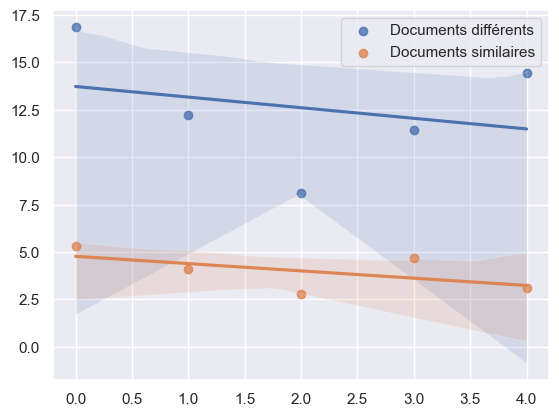

In [69]:
# graphique des distances pour les documents différents comparés aux documents similaires (lineplot) avec en Y le cosine similarity et en X les documents (regplot)
print(sns.color_palette("pastel6").as_hex())
sns.regplot(x=[i for i in range(len(document_different))], y=distance_different, label="Documents différents")
sns.regplot(x=[i for i in range(len(document_similaire))], y=distance_similaire, label="Documents similaires")
# sns.lineplot(x=[i for i in range(len(document_different))], y=distance_different, color='#b9f2f0')
# sns.lineplot(x=[i for i in range(len(document_similaire))], y=distance_similaire , color='#f2b9f2')
plt.legend()